In [1]:
import sys
import numpy as np
from tqdm import tqdm
#!{sys.executable} -m pip install nilearn #install relevant package
from preprocessing import load_and_mask_miyawaki_data, plt_background
import matplotlib.pyplot as plt

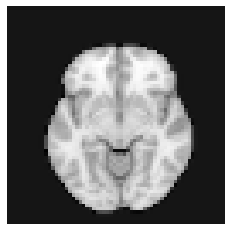

In [2]:
#Plot the pretty brain we are working on
plt_background()

In [3]:
fmri_data, stimuli, fmri_figures_data, stimuli_figures, masker = load_and_mask_miyawaki_data()

Preprocessing data...

Preprocessed fMRI data: 2860 samples x 5438 voxels
Preprocessed stimuli data: 2860 samples x 100 pixels
1536 geometrical figures


 Done (28.82s).


In [4]:
#erase black figs: useless for our use of the data
print(np.shape(stimuli))
print(np.shape(fmri_data))
        
stimuli2 = np.array([element for element in stimuli if np.sum(element) != -100])
fmri_data2 = np.array([fmri_data[i] for i in range(len(fmri_data)) if np.sum(stimuli[i]) != -100])

    
print(np.shape(stimuli2))
print(np.shape(fmri_data2))

(2860, 100)
(2860, 5438)
(1320, 100)
(1320, 5438)


In [5]:
#erase black figs: useless for our use of the data
print(np.shape(stimuli_figures))
print(np.shape(fmri_figures_data))
        
stimuli_figures2 = np.array([element for element in stimuli_figures if np.sum(element) != -100])
fmri_figures_data2 = np.array([fmri_figures_data[i] for i in range(len(fmri_figures_data)) if np.sum(stimuli_figures[i]) != -100])

    
print(np.shape(stimuli_figures2))
print(np.shape(fmri_figures_data2))

(1536, 100)
(1536, 5438)
(720, 100)
(720, 5438)


## First step: Decoding


Let's infer the binary visual stimulus presented to the subject from the recorded fMRI data.

Simple classification: X = fMRI data, y = binary stimuli

As done in Abraham et al., we first use a l1 logistic regression

Issue: the article is from 2014, so some of the code is deprecated: need to correct it

In [ ]:
"""from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif

pipeline_LR = Pipeline(steps=[('selection', SelectKBest(f_classif, k=500)),('clf', LR(penalty='l1', C=0.05))])

scores_lr = []
# y_train = n_samples x n_voxels
# To iterate on voxels, we transpose it. 
for pixel in tqdm(y_train.T):
    score = cross_val_score(pipeline_LR, X_train, pixel, cv=5)
    scores_lr.append(score)"""

In [1]:
from sklearn.model_selection import train_test_split

train_to_test_ratio = 0.8
X_train, X_test, Y_train, Y_test =train_test_split(fmri_data2, stimuli2, 
                                        train_size=train_to_test_ratio, 
                                        test_size=1.0-train_to_test_ratio)

NameError: name 'fmri_data' is not defined

In [7]:
from sklearn import linear_model
from sklearn.preprocessing import scale

C_list = [0.0005, 0.001, 0.005, 0.01, 0.05, 0.1]

logreg_table = []
train_accuracy, test_accuracy = np.zeros(100), np.zeros(100)

#Train pixel by pixel: fit a logreg for each pixel
for i,pixel in tqdm(enumerate(np.transpose(Y_train))):
    
    # define logistic regressor
    logreg = linear_model.LogisticRegression(penalty='l2', C=0.05, max_iter = 10000)
    
    # fit training data
    logreg.fit(X_train, pixel)
    
    logreg_table.append(logreg)
    
    # check accuracy
    train_accuracy[i]=logreg.score(X_train,pixel)
    test_accuracy[i]=logreg.score(X_test,np.transpose(Y_test)[i])
    
    print('accuracy: train, test')
    print('liblin: %0.4f, %0.4f' %(train_accuracy[i],test_accuracy[i]) )

1it [00:01,  1.43s/it]

accuracy: train, test
liblin: 1.0000, 0.6098


2it [00:03,  2.09s/it]

accuracy: train, test
liblin: 1.0000, 0.6439


3it [00:06,  2.43s/it]

accuracy: train, test
liblin: 1.0000, 0.6250


4it [00:10,  3.00s/it]

accuracy: train, test
liblin: 1.0000, 0.5682


5it [00:13,  2.88s/it]

accuracy: train, test
liblin: 1.0000, 0.6061


6it [00:16,  2.83s/it]

accuracy: train, test
liblin: 1.0000, 0.5909


7it [00:18,  2.80s/it]

accuracy: train, test
liblin: 1.0000, 0.5909


8it [00:21,  2.75s/it]

accuracy: train, test
liblin: 1.0000, 0.5947


9it [00:24,  2.81s/it]

accuracy: train, test
liblin: 1.0000, 0.5947


10it [00:25,  2.37s/it]

accuracy: train, test
liblin: 1.0000, 0.6174


11it [00:27,  2.07s/it]

accuracy: train, test
liblin: 1.0000, 0.6439


12it [00:30,  2.30s/it]

accuracy: train, test
liblin: 1.0000, 0.6250


13it [00:32,  2.42s/it]

accuracy: train, test
liblin: 1.0000, 0.6288


14it [00:35,  2.56s/it]

accuracy: train, test
liblin: 1.0000, 0.6212


15it [00:38,  2.70s/it]

accuracy: train, test
liblin: 1.0000, 0.6288


16it [00:41,  2.70s/it]

accuracy: train, test
liblin: 1.0000, 0.6856


17it [00:43,  2.66s/it]

accuracy: train, test
liblin: 1.0000, 0.6894


18it [00:45,  2.25s/it]

accuracy: train, test
liblin: 1.0000, 0.6439


19it [00:47,  2.32s/it]

accuracy: train, test
liblin: 1.0000, 0.5909


20it [00:50,  2.38s/it]

accuracy: train, test
liblin: 1.0000, 0.6288


21it [00:53,  2.51s/it]

accuracy: train, test
liblin: 1.0000, 0.5871


22it [00:56,  2.90s/it]

accuracy: train, test
liblin: 1.0000, 0.6515


23it [00:59,  2.81s/it]

accuracy: train, test
liblin: 1.0000, 0.6212


24it [01:01,  2.73s/it]

accuracy: train, test
liblin: 1.0000, 0.6970


25it [01:04,  2.70s/it]

accuracy: train, test
liblin: 1.0000, 0.7121


26it [01:06,  2.55s/it]

accuracy: train, test
liblin: 1.0000, 0.7197


27it [01:07,  2.12s/it]

accuracy: train, test
liblin: 1.0000, 0.7462


28it [01:11,  2.60s/it]

accuracy: train, test
liblin: 1.0000, 0.7159


29it [01:13,  2.47s/it]

accuracy: train, test
liblin: 1.0000, 0.6515


30it [01:15,  2.11s/it]

accuracy: train, test
liblin: 1.0000, 0.6629


31it [01:17,  2.24s/it]

accuracy: train, test
liblin: 1.0000, 0.6212


32it [01:20,  2.28s/it]

accuracy: train, test
liblin: 1.0000, 0.6288


33it [01:22,  2.29s/it]

accuracy: train, test
liblin: 1.0000, 0.7500


34it [01:25,  2.43s/it]

accuracy: train, test
liblin: 1.0000, 0.8409


35it [01:27,  2.32s/it]

accuracy: train, test
liblin: 1.0000, 0.8409


36it [01:29,  2.29s/it]

accuracy: train, test
liblin: 1.0000, 0.8826


37it [01:31,  2.24s/it]

accuracy: train, test
liblin: 1.0000, 0.8295


38it [01:33,  2.29s/it]

accuracy: train, test
liblin: 1.0000, 0.7159


39it [01:36,  2.37s/it]

accuracy: train, test
liblin: 1.0000, 0.6553


40it [01:40,  2.89s/it]

accuracy: train, test
liblin: 1.0000, 0.6402


41it [01:43,  2.92s/it]

accuracy: train, test
liblin: 1.0000, 0.6288


42it [01:46,  2.86s/it]

accuracy: train, test
liblin: 1.0000, 0.7348


43it [01:48,  2.81s/it]

accuracy: train, test
liblin: 1.0000, 0.8447


44it [01:51,  2.65s/it]

accuracy: train, test
liblin: 1.0000, 0.9356


45it [01:52,  2.27s/it]

accuracy: train, test
liblin: 1.0000, 0.9848


46it [01:53,  1.79s/it]

accuracy: train, test
liblin: 1.0000, 0.9735


47it [01:55,  2.00s/it]

accuracy: train, test
liblin: 1.0000, 0.9318


48it [01:58,  2.12s/it]

accuracy: train, test
liblin: 1.0000, 0.8788


49it [02:00,  2.28s/it]

accuracy: train, test
liblin: 1.0000, 0.7424


50it [02:03,  2.45s/it]

accuracy: train, test
liblin: 1.0000, 0.6477


51it [02:06,  2.62s/it]

accuracy: train, test
liblin: 1.0000, 0.7045


52it [02:09,  2.63s/it]

accuracy: train, test
liblin: 1.0000, 0.7424


53it [02:11,  2.47s/it]

accuracy: train, test
liblin: 1.0000, 0.8485


54it [02:13,  2.22s/it]

accuracy: train, test
liblin: 1.0000, 0.9318


55it [02:14,  1.87s/it]

accuracy: train, test
liblin: 1.0000, 1.0000


56it [02:14,  1.47s/it]

accuracy: train, test
liblin: 1.0000, 0.9848


57it [02:16,  1.57s/it]

accuracy: train, test
liblin: 1.0000, 0.9735


58it [02:18,  1.78s/it]

accuracy: train, test
liblin: 1.0000, 0.8598


59it [02:21,  2.01s/it]

accuracy: train, test
liblin: 1.0000, 0.6932


60it [02:24,  2.41s/it]

accuracy: train, test
liblin: 1.0000, 0.6402


61it [02:27,  2.63s/it]

accuracy: train, test
liblin: 1.0000, 0.6742


62it [02:29,  2.32s/it]

accuracy: train, test
liblin: 1.0000, 0.6402


63it [02:30,  2.02s/it]

accuracy: train, test
liblin: 1.0000, 0.7348


64it [02:33,  2.19s/it]

accuracy: train, test
liblin: 1.0000, 0.8030


65it [02:35,  2.29s/it]

accuracy: train, test
liblin: 1.0000, 0.9508


66it [02:37,  2.18s/it]

accuracy: train, test
liblin: 1.0000, 0.9242


67it [02:40,  2.28s/it]

accuracy: train, test
liblin: 1.0000, 0.7879


68it [02:42,  2.41s/it]

accuracy: train, test
liblin: 1.0000, 0.7500


69it [02:45,  2.39s/it]

accuracy: train, test
liblin: 1.0000, 0.6667


70it [02:47,  2.41s/it]

accuracy: train, test
liblin: 1.0000, 0.7045


71it [02:50,  2.46s/it]

accuracy: train, test
liblin: 1.0000, 0.6591


72it [02:52,  2.51s/it]

accuracy: train, test
liblin: 1.0000, 0.6591


73it [02:54,  2.13s/it]

accuracy: train, test
liblin: 1.0000, 0.7576


74it [02:57,  2.45s/it]

accuracy: train, test
liblin: 1.0000, 0.6061


75it [02:58,  2.09s/it]

accuracy: train, test
liblin: 1.0000, 0.7538


76it [03:01,  2.20s/it]

accuracy: train, test
liblin: 1.0000, 0.6402


77it [03:03,  2.32s/it]

accuracy: train, test
liblin: 1.0000, 0.6288


78it [03:06,  2.34s/it]

accuracy: train, test
liblin: 1.0000, 0.6553


79it [03:08,  2.39s/it]

accuracy: train, test
liblin: 1.0000, 0.6288


80it [03:11,  2.47s/it]

accuracy: train, test
liblin: 1.0000, 0.5985


81it [03:12,  2.15s/it]

accuracy: train, test
liblin: 1.0000, 0.6250


82it [03:15,  2.24s/it]

accuracy: train, test
liblin: 1.0000, 0.6212


83it [03:16,  1.96s/it]

accuracy: train, test
liblin: 1.0000, 0.6894


84it [03:17,  1.81s/it]

accuracy: train, test
liblin: 1.0000, 0.6098


85it [03:20,  2.14s/it]

accuracy: train, test
liblin: 1.0000, 0.5985


86it [03:22,  1.97s/it]

accuracy: train, test
liblin: 1.0000, 0.6629


87it [03:25,  2.27s/it]

accuracy: train, test
liblin: 1.0000, 0.6515


88it [03:27,  2.38s/it]

accuracy: train, test
liblin: 1.0000, 0.5985


89it [03:29,  2.06s/it]

accuracy: train, test
liblin: 1.0000, 0.6212


90it [03:31,  2.22s/it]

accuracy: train, test
liblin: 1.0000, 0.6364


91it [03:33,  2.01s/it]

accuracy: train, test
liblin: 1.0000, 0.6174


92it [03:36,  2.34s/it]

accuracy: train, test
liblin: 1.0000, 0.5189


93it [03:37,  2.08s/it]

accuracy: train, test
liblin: 1.0000, 0.5795


94it [03:40,  2.30s/it]

accuracy: train, test
liblin: 1.0000, 0.6288


95it [03:43,  2.37s/it]

accuracy: train, test
liblin: 1.0000, 0.5909


96it [03:44,  2.04s/it]

accuracy: train, test
liblin: 1.0000, 0.5985


97it [03:47,  2.24s/it]

accuracy: train, test
liblin: 1.0000, 0.6288


98it [03:48,  1.97s/it]

accuracy: train, test
liblin: 1.0000, 0.6250


99it [03:49,  1.77s/it]

accuracy: train, test
liblin: 1.0000, 0.6023


100it [03:52,  2.33s/it]

accuracy: train, test
liblin: 1.0000, 0.5985


In [8]:
image = np.zeros(100)


n=50
xtest = fmri_figures_data2[n].reshape(1,-1)
ytest = np.reshape(stimuli_figures2[n],(10,10))

for i,pixel in enumerate(image) :
    #try: 
    y = logreg_table[i].predict(xtest)
    
    image[i] = y
    
image = np.reshape(image,(10,10))

from sklearn.preprocessing import Binarizer

image = Binarizer(threshold=0.5).fit_transform(image)

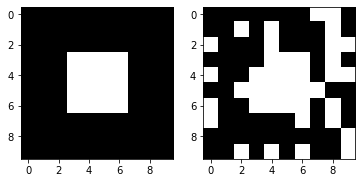

In [9]:
import matplotlib.pyplot as plt

fig = plt.figure()
sp1 = plt.subplot(121)
sp2 = plt.subplot(122)
sp1.imshow(ytest, cmap = plt.cm.gray, interpolation = 'nearest')
sp2.imshow(image, cmap = plt.cm.gray, interpolation = 'nearest')

In [89]:
np.mean(test_accuracy)

0.6966287878787878

In [156]:
tot = 0

for i,elmnt in enumerate(stimuli) :
    print(np.sum(elmnt))

-100.0
-100.0
-100.0
-100.0
-100.0
-100.0
-100.0
-100.0
-100.0
-100.0
46.0
46.0
46.0
-100.0
-100.0
-100.0
59.0
59.0
59.0
-100.0
-100.0
-100.0
50.0
50.0
50.0
-100.0
-100.0
-100.0
53.0
53.0
53.0
-100.0
-100.0
-100.0
40.0
40.0
40.0
-100.0
-100.0
-100.0
49.0
49.0
49.0
-100.0
-100.0
-100.0
59.0
59.0
59.0
-100.0
-100.0
-100.0
54.0
54.0
54.0
-100.0
-100.0
-100.0
50.0
50.0
50.0
-100.0
-100.0
-100.0
55.0
55.0
55.0
-100.0
-100.0
-100.0
50.0
50.0
50.0
-100.0
-100.0
-100.0
51.0
51.0
51.0
-100.0
-100.0
-100.0
57.0
57.0
57.0
-100.0
-100.0
-100.0
55.0
55.0
55.0
-100.0
-100.0
-100.0
43.0
43.0
43.0
-100.0
-100.0
-100.0
51.0
51.0
51.0
-100.0
-100.0
-100.0
51.0
51.0
51.0
-100.0
-100.0
-100.0
45.0
45.0
45.0
-100.0
-100.0
-100.0
61.0
61.0
61.0
-100.0
-100.0
-100.0
54.0
54.0
54.0
-100.0
-100.0
-100.0
50.0
50.0
50.0
-100.0
-100.0
-100.0
54.0
54.0
54.0
-100.0
-100.0
-100.0
-100.0
-100.0
-100.0
-100.0
-100.0
-100.0
-100.0
-100.0
-100.0
-100.0
-100.0
53.0
53.0
53.0
-100.0
-100.0
-100.0
57.0
57.0
57.0
-100.0
-10

## Second step: Encoding

In [1]:
from sklearn.linear_model import Ridge 
from sklearn.model_selection import KFold

cv = KFold(n_splits=10)

# Fit ridge model, calculate predictions on left out data
# and evaluate r^2 score for each voxel
scores = []
for train, test in tqdm(cv.split(y_train)):
    pred = (Ridge(alpha=100.).fit(y_train[train], X_train[train]).predict(y_train[test]))
    X_true = X_train[test]
    scores.append(1. - ((X_true - pred)** 2).sum(axis=0) /((X_true - X_true.mean(axis=0))** 2).sum(axis=0))
mean_scores = np.mean(scores, axis=0)


NameError: name 'tqdm' is not defined

In [19]:
from sklearn.linear_model import LassoLarsCV
# choose number of voxels to treat, set to None for all voxels
n_voxels = 50
# choose best voxels
indices = mean_scores.argsort()[::-1][:n_voxels]
lasso = LassoLarsCV(max_iter=10)
receptive_fields = [] 
for index in indices:
    lasso.fit(y_train, X_train[:, index])
    receptive_fields.append(lasso.coef_.
        reshape(10, 10))